In [18]:
import pandas as pd
import sys
from collections import defaultdict
import hypernetx as hnx
import matplotlib.pyplot as plt
sys.path.append("../../preprocessing")
from drug import create_shared_hypergraph_with_labels
from protein import create_shared_protein_hypergraph, get_model

In [19]:
model, alphabet = get_model()

In [35]:
def find_key_by_value(combined_node_labels, value):
    for n_id, node_value in combined_node_labels.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
        if (node_value.startswith(value) and node_value.endswith(value)) or node_value == value:
            return n_id

In [36]:
import hypernetx as hnx
import matplotlib.pyplot as plt

def create_global_hypergraph_from_drug_and_proteins(
    drug_to_proteins: dict[str, list[str]],
    result_shared_drug: tuple[dict[int, str], dict[str, list[int]]],
    result_shared_proteins: dict[str, tuple[dict[int, str], dict[str, list[int]]]],
    plot: bool = True
) -> tuple[dict[int, str], dict[str, list[int]]]:

    global_node_labels, global_hyperedges =result_shared_drug
    global_node_labels_p, global_hyperedges_p = result_shared_proteins

    combined_hyperedges = global_hyperedges
    combined_node_labels = global_node_labels

    max_node_n = len(combined_node_labels)

    #increase each node nr by global_node_labels_p
    for global_node_label_p_key, global_node_label_p_value  in global_node_labels_p.items():
        combined_node_labels[global_node_label_p_key+max_node_n] = global_node_label_p_value
    for global_hyperedge_p_key, global_hyperedge_p_value  in global_hyperedges_p.items():
        combined_hyperedges[global_hyperedge_p_key] = [x+max_node_n for x in global_hyperedge_p_value]

    for drug, proteins in drug_to_proteins.items():
        drug_node_id = find_key_by_value(combined_node_labels, drug)
        protein_ids = [find_key_by_value(combined_node_labels, x) for x in proteins]
        protein_ids.append(drug_node_id)
        combined_hyperedges[drug+"_PROTEINS"] = protein_ids

    # 5) Optional zeichnen
    if plot:
        H = hnx.Hypergraph(combined_hyperedges)
        plt.figure(figsize=(48, 32))
        hnx.draw(
            H,
            with_node_labels=True,
            node_labels=combined_node_labels,
            with_edge_labels=True
        )
        plt.title("Global Hypergraph: Drug + Proteins")
        plt.show()

    return combined_node_labels, combined_hyperedges

In [23]:
df = pd.read_csv('full_data.csv')
df_5 = df[0:20]

In [24]:
df_5

Unnamed: 0  Drugs                                             SMILES  \
0            0      0          Cc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1   
1            1      1         COc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1   
2            2      2              NS(=O)(=O)c1ccc(s1)S(=O)(=O)NCc1cccs1   
3            3      3       NS(=O)(=O)c1cc2C(O)CN(Cc3cccs3)S(=O)(=O)c2s1   
4            4      4     COc1ccc(cc1)N1CC(O)c2cc(sc2S1(=O)=O)S(N)(=O)=O   
5            5      5     CCN[C@H]1CN(CCOC)S(=O)(=O)c2sc(cc12)S(N)(=O)=O   
6            6      6    CCN[C@H]1CN(CCCOC)S(=O)(=O)c2sc(cc12)S(N)(=O)=O   
7            7      7        COc1cccc(c1)N1CCc2cc(sc2S1(=O)=O)S(N)(=O)=O   
8            8      8  CN[C@H]1CN(c2cccc(OC)c2)S(=O)(=O)c2sc(cc12)S(N...   
9            9      9  CN[C@@H]1CN(c2cccc(OC)c2)S(=O)(=O)c2sc(cc12)S(...   
10          10     10             NS(=O)(=O)c1ccc(cc1)C(=O)NCc1ccc(F)cc1   
11          11     11            NS(=O)(=O)c1ccc(cc1)C(=O)NCc1ccc(F)cc1F   
12          12     12            NS(=O)(=O)c1ccc(cc1)C(=O)NCc1cc(F)ccc1F   
13          13     13            NS(=O)(=O)c1ccc(cc1)C(=O)NCc1c(F)cccc1F   
14          14     14         NS(=O)(=O)c1ccc(cc1)C(=O)NCc1ccc(F)c(F)c1F   
15          15     15         NS(=O)(=O)c1ccc(cc1)C(=O)NCc1c(F)cc(F)cc1F   
16          16     16       NS(=O)(=O)c1ccc(cc1)C(=O)NCc1cc(F)c(F)c(F)c1   
17          17     17   NS(=O)(=O)c1ccc(cc1)C(=O)NCc1c(F)c(F)c(F)c(F)c1F   
18          18     18  CN[C@@H](C)C(=O)N[C@H](C(=O)N1CCC[C@H]1C(=O)N[...   
19          19     19  CN[C@@H](C)C(=O)N[C@H](C(=O)N1C[C@H](C[C@H]1C(...   

   Proteins                                           sequence  Label  
0    P00918  MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...      1  
1    P00918  MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...      1  
2    P00918  MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...      1  
3    P00918  MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...      1  
4    P00918  MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...      1  
5    P00918  MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...      1  
6    P00918  MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...      1  
7    P00918  MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...      1  
8    P00918  MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...      1  
9    P00918  MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...      1  
10       10  SHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPL...      1  
11       10  SHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPL...      1  
12       10  SHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPL...      1  
13       10  SHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPL...      1  
14       10  SHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPL...      1  
15       10  SHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPL...      1  
16       10  SHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPL...      1  
17       10  SHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPL...      1  
18       44  MSDAVSSDRNFPNSTNLPRNPSMADYEARIFTFGTWIYSVNKEQLA...      1  
19       44  MSDAVSSDRNFPNSTNLPRNPSMADYEARIFTFGTWIYSVNKEQLA...      1

In [26]:
smiles = df_5['SMILES']
proteins = df_5['Proteins']
sequences = df_5['sequence']
proteins_sequences = list(zip(proteins, sequences))

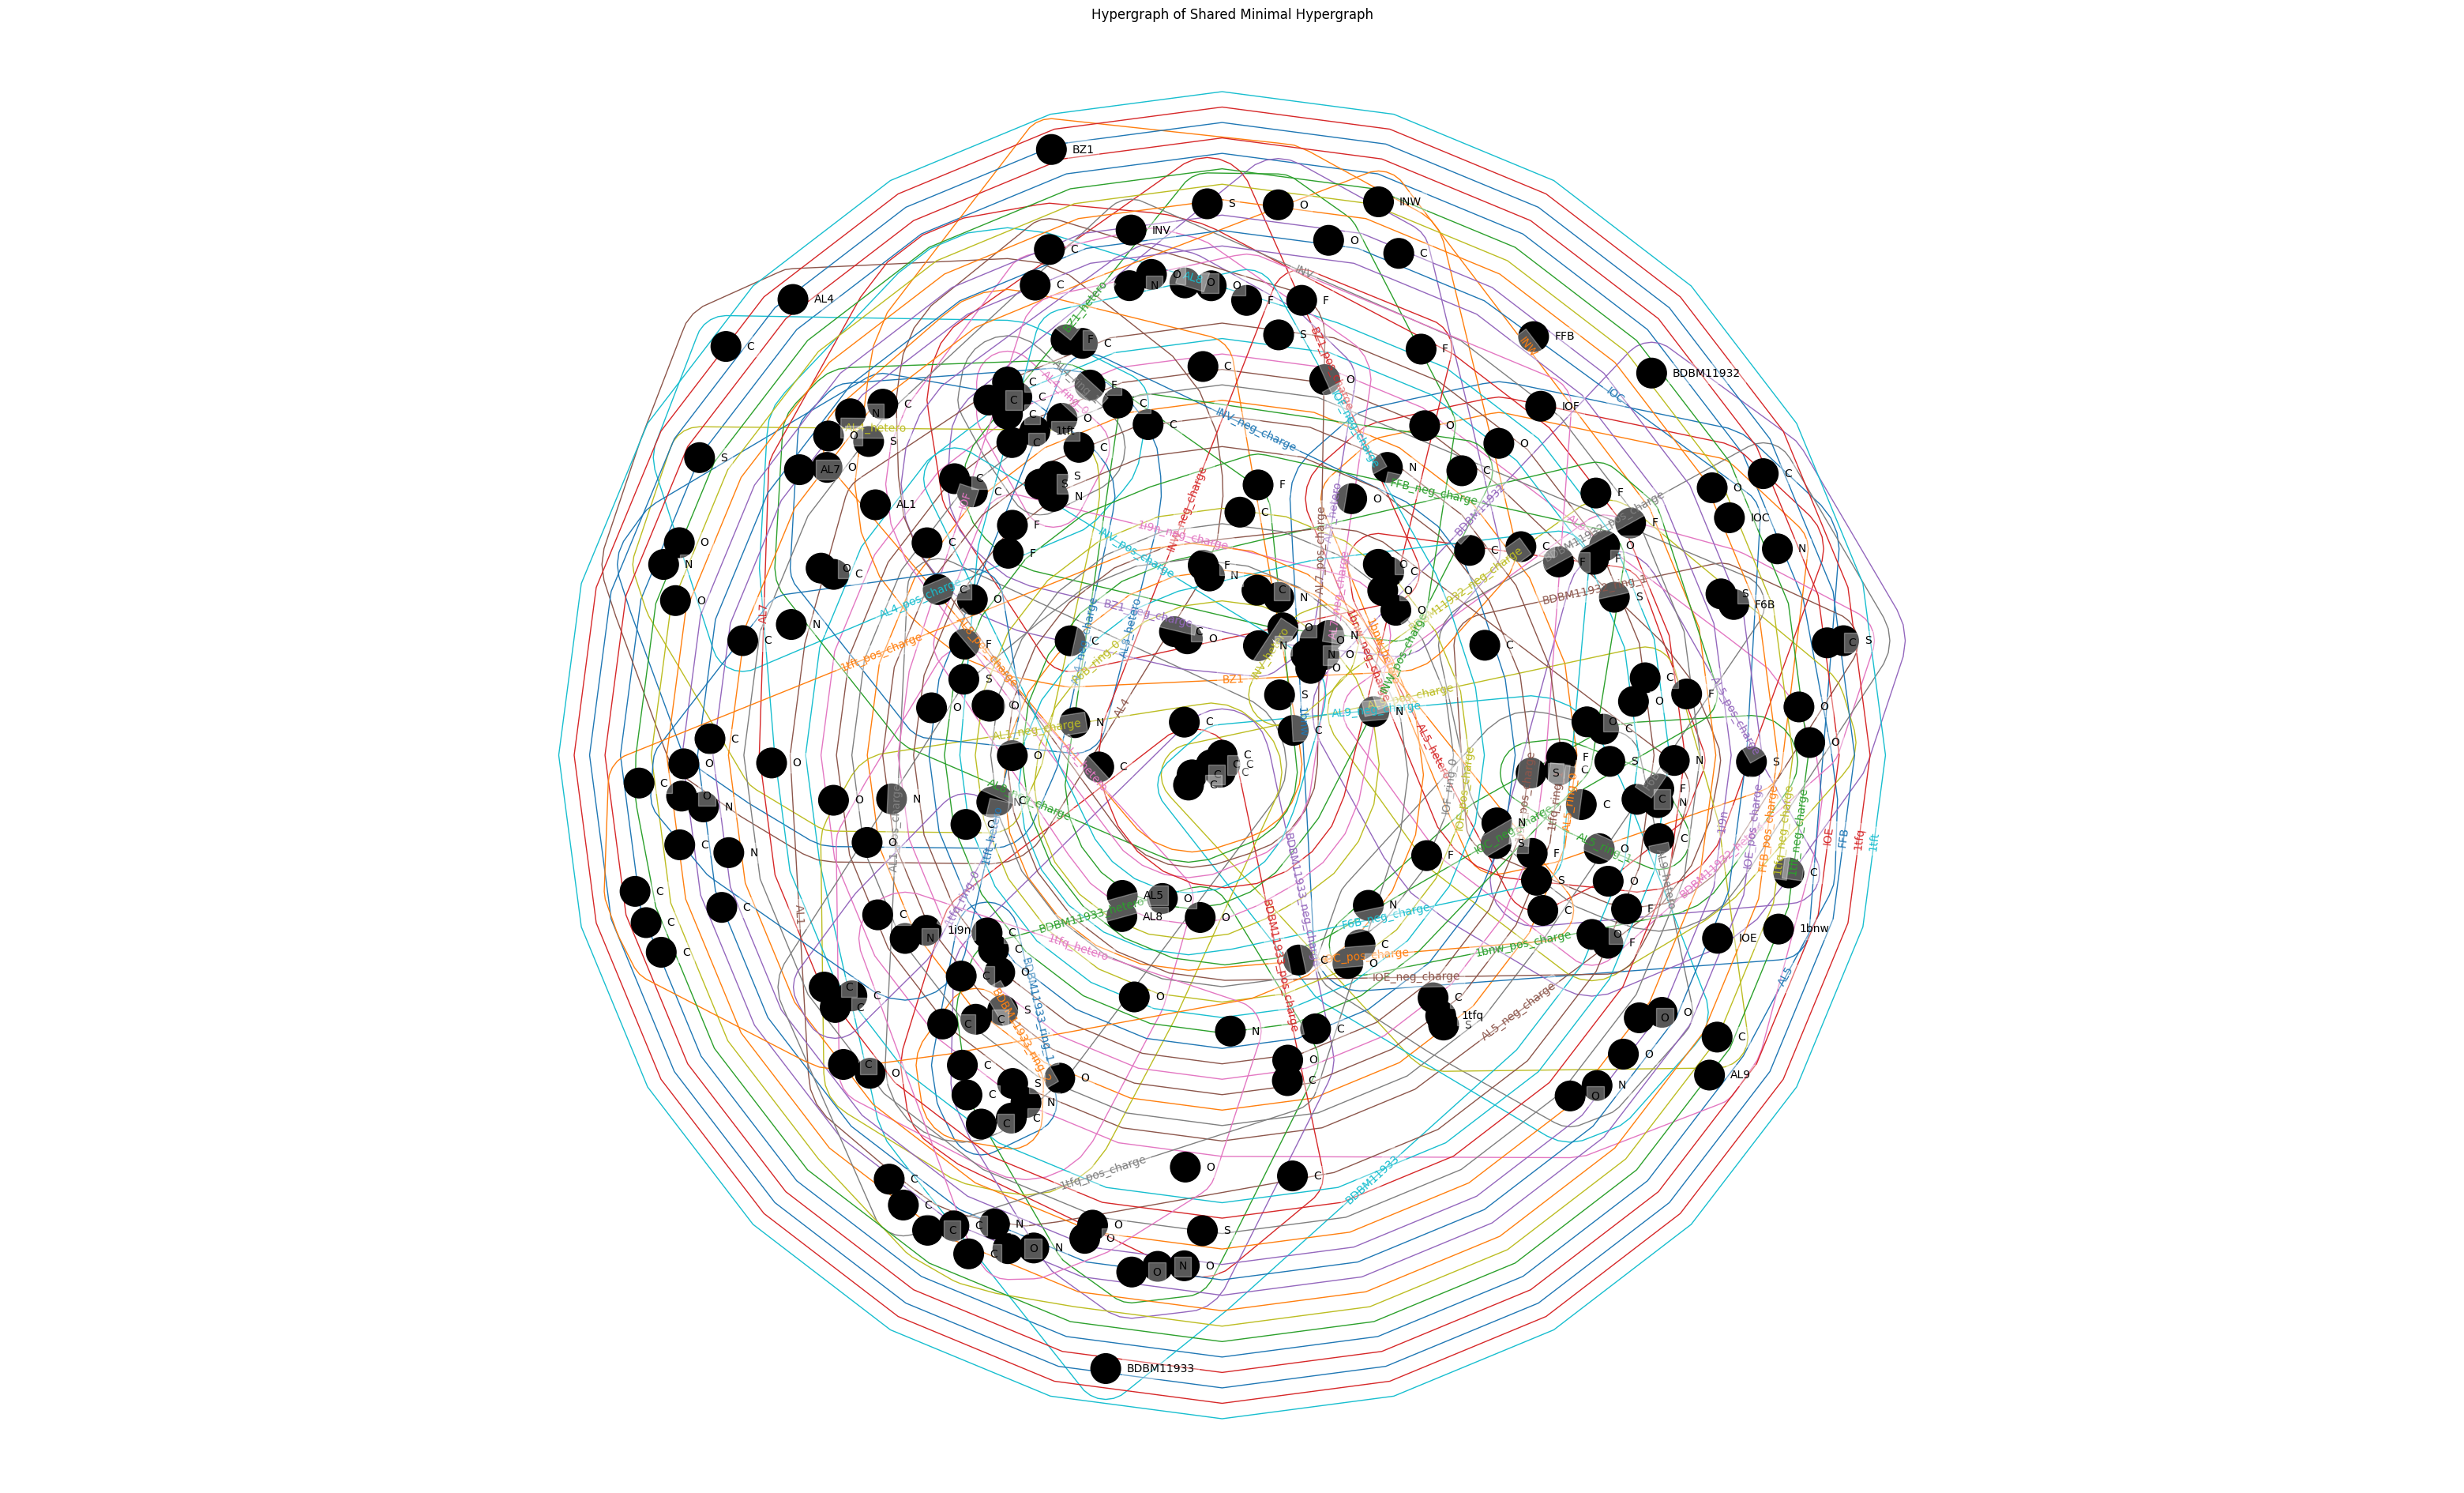

In [27]:
global_node_labels, global_hyperedges, trade_names, global_node_features, global_edge_features = create_shared_hypergraph_with_labels(smiles)

In [28]:
drug_proteins = list(zip(trade_names, proteins))
drug_to_proteins = defaultdict(list)
for drug, protein in drug_proteins:
    drug_to_proteins[drug].append(protein)

# If you want a regular dict:
drug_to_proteins = dict(drug_to_proteins)

In [29]:
drug_to_proteins

{'AL5': ['P00918'],
 'AL9': ['P00918'],
 '1bnw': ['P00918'],
 'BDBM11932': ['P00918'],
 'BDBM11933': ['P00918'],
 'AL4': ['P00918'],
 'BZ1': ['P00918'],
 'AL1': ['P00918'],
 'AL8': ['P00918'],
 'AL7': ['P00918'],
 'INV': ['10'],
 'INW': ['10'],
 '1i9n': ['10'],
 'F6B': ['10'],
 'IOC': ['10'],
 'IOE': ['10'],
 'IOF': ['10'],
 'FFB': ['10'],
 '1tfq': ['44'],
 '1tft': ['44']}

Some weights of the model checkpoint at Rostlab/prot_bert_bfd were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at Rostlab/prot_bert_bfd were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a

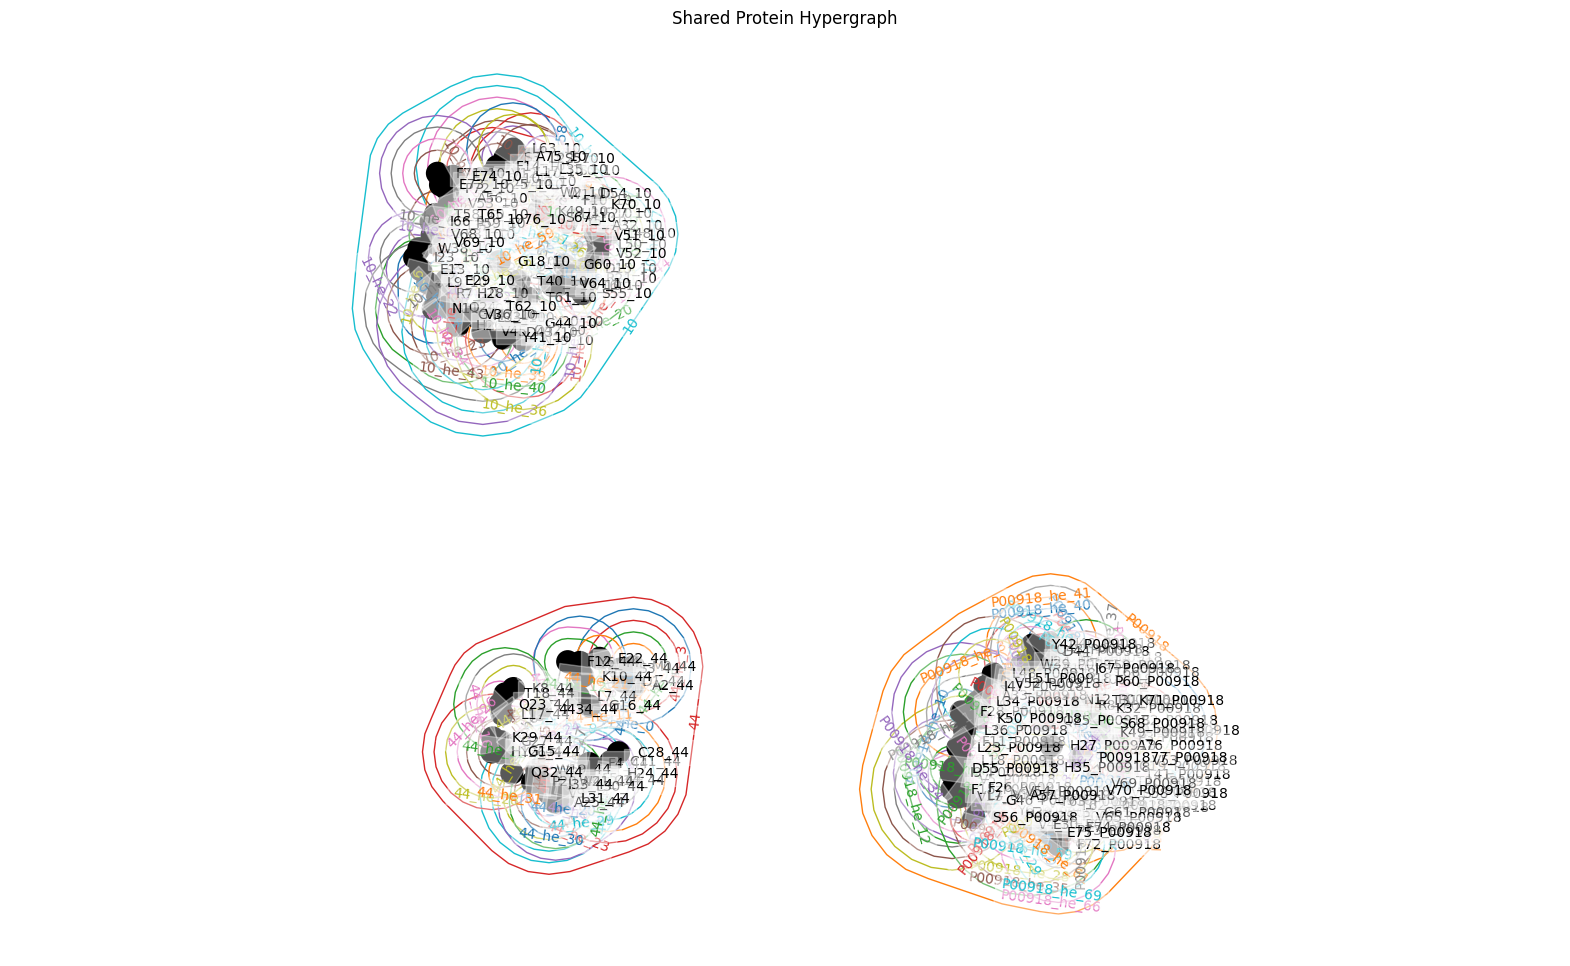

In [30]:
global_node_labels_p, global_hyperedges_p, global_node_features_p = create_shared_protein_hypergraph(proteins_sequences, model,alphabet,)

In [41]:
drug_proteins

[('AL5', 'P00918'),
 ('AL9', 'P00918'),
 ('1bnw', 'P00918'),
 ('BDBM11932', 'P00918'),
 ('BDBM11933', 'P00918'),
 ('AL4', 'P00918'),
 ('BZ1', 'P00918'),
 ('AL1', 'P00918'),
 ('AL8', 'P00918'),
 ('AL7', 'P00918'),
 ('INV', '10'),
 ('INW', '10'),
 ('1i9n', '10'),
 ('F6B', '10'),
 ('IOC', '10'),
 ('IOE', '10'),
 ('IOF', '10'),
 ('FFB', '10'),
 ('1tfq', '44'),
 ('1tft', '44')]

In [42]:
result_shared_drug = (global_node_labels, global_hyperedges)
result_shared_proteins = (global_node_labels_p, global_hyperedges_p)

In [43]:
result_shared_proteins

({0: 'W0_P00918',
  1: 'Q1_P00918',
  2: 'S2_P00918',
  3: 'P3_P00918',
  4: 'V4_P00918',
  5: 'V5_P00918',
  6: 'Y6_P00918',
  7: 'L7_P00918',
  8: 'R8_P00918',
  9: 'I9_P00918',
  10: 'L10_P00918',
  11: 'F11_P00918',
  12: 'N12_P00918',
  13: 'V13_P00918',
  14: 'E14_P00918',
  15: 'F15_P00918',
  16: 'D16_P00918',
  17: 'V17_P00918',
  18: 'L18_P00918',
  19: 'G19_P00918',
  20: 'T20_P00918',
  21: 'Y21_P00918',
  22: 'R22_P00918',
  23: 'L23_P00918',
  24: 'I24_P00918',
  25: 'Q25_P00918',
  26: 'F26_P00918',
  27: 'H27_P00918',
  28: 'F28_P00918',
  29: 'H29_P00918',
  30: 'E30_P00918',
  31: 'T31_P00918',
  32: 'K32_P00918',
  33: 'A33_P00918',
  34: 'L34_P00918',
  35: 'H35_P00918',
  36: 'L36_P00918',
  37: 'V37_P00918',
  38: 'H38_P00918',
  39: 'W39_P00918',
  40: 'N40_P00918',
  41: 'T41_P00918',
  42: 'Y42_P00918',
  43: 'Q43_P00918',
  44: 'D44_P00918',
  45: 'V45_P00918',
  46: 'G46_P00918',
  47: 'I47_P00918',
  48: 'L48_P00918',
  49: 'K49_P00918',
  50: 'K50_P00918',


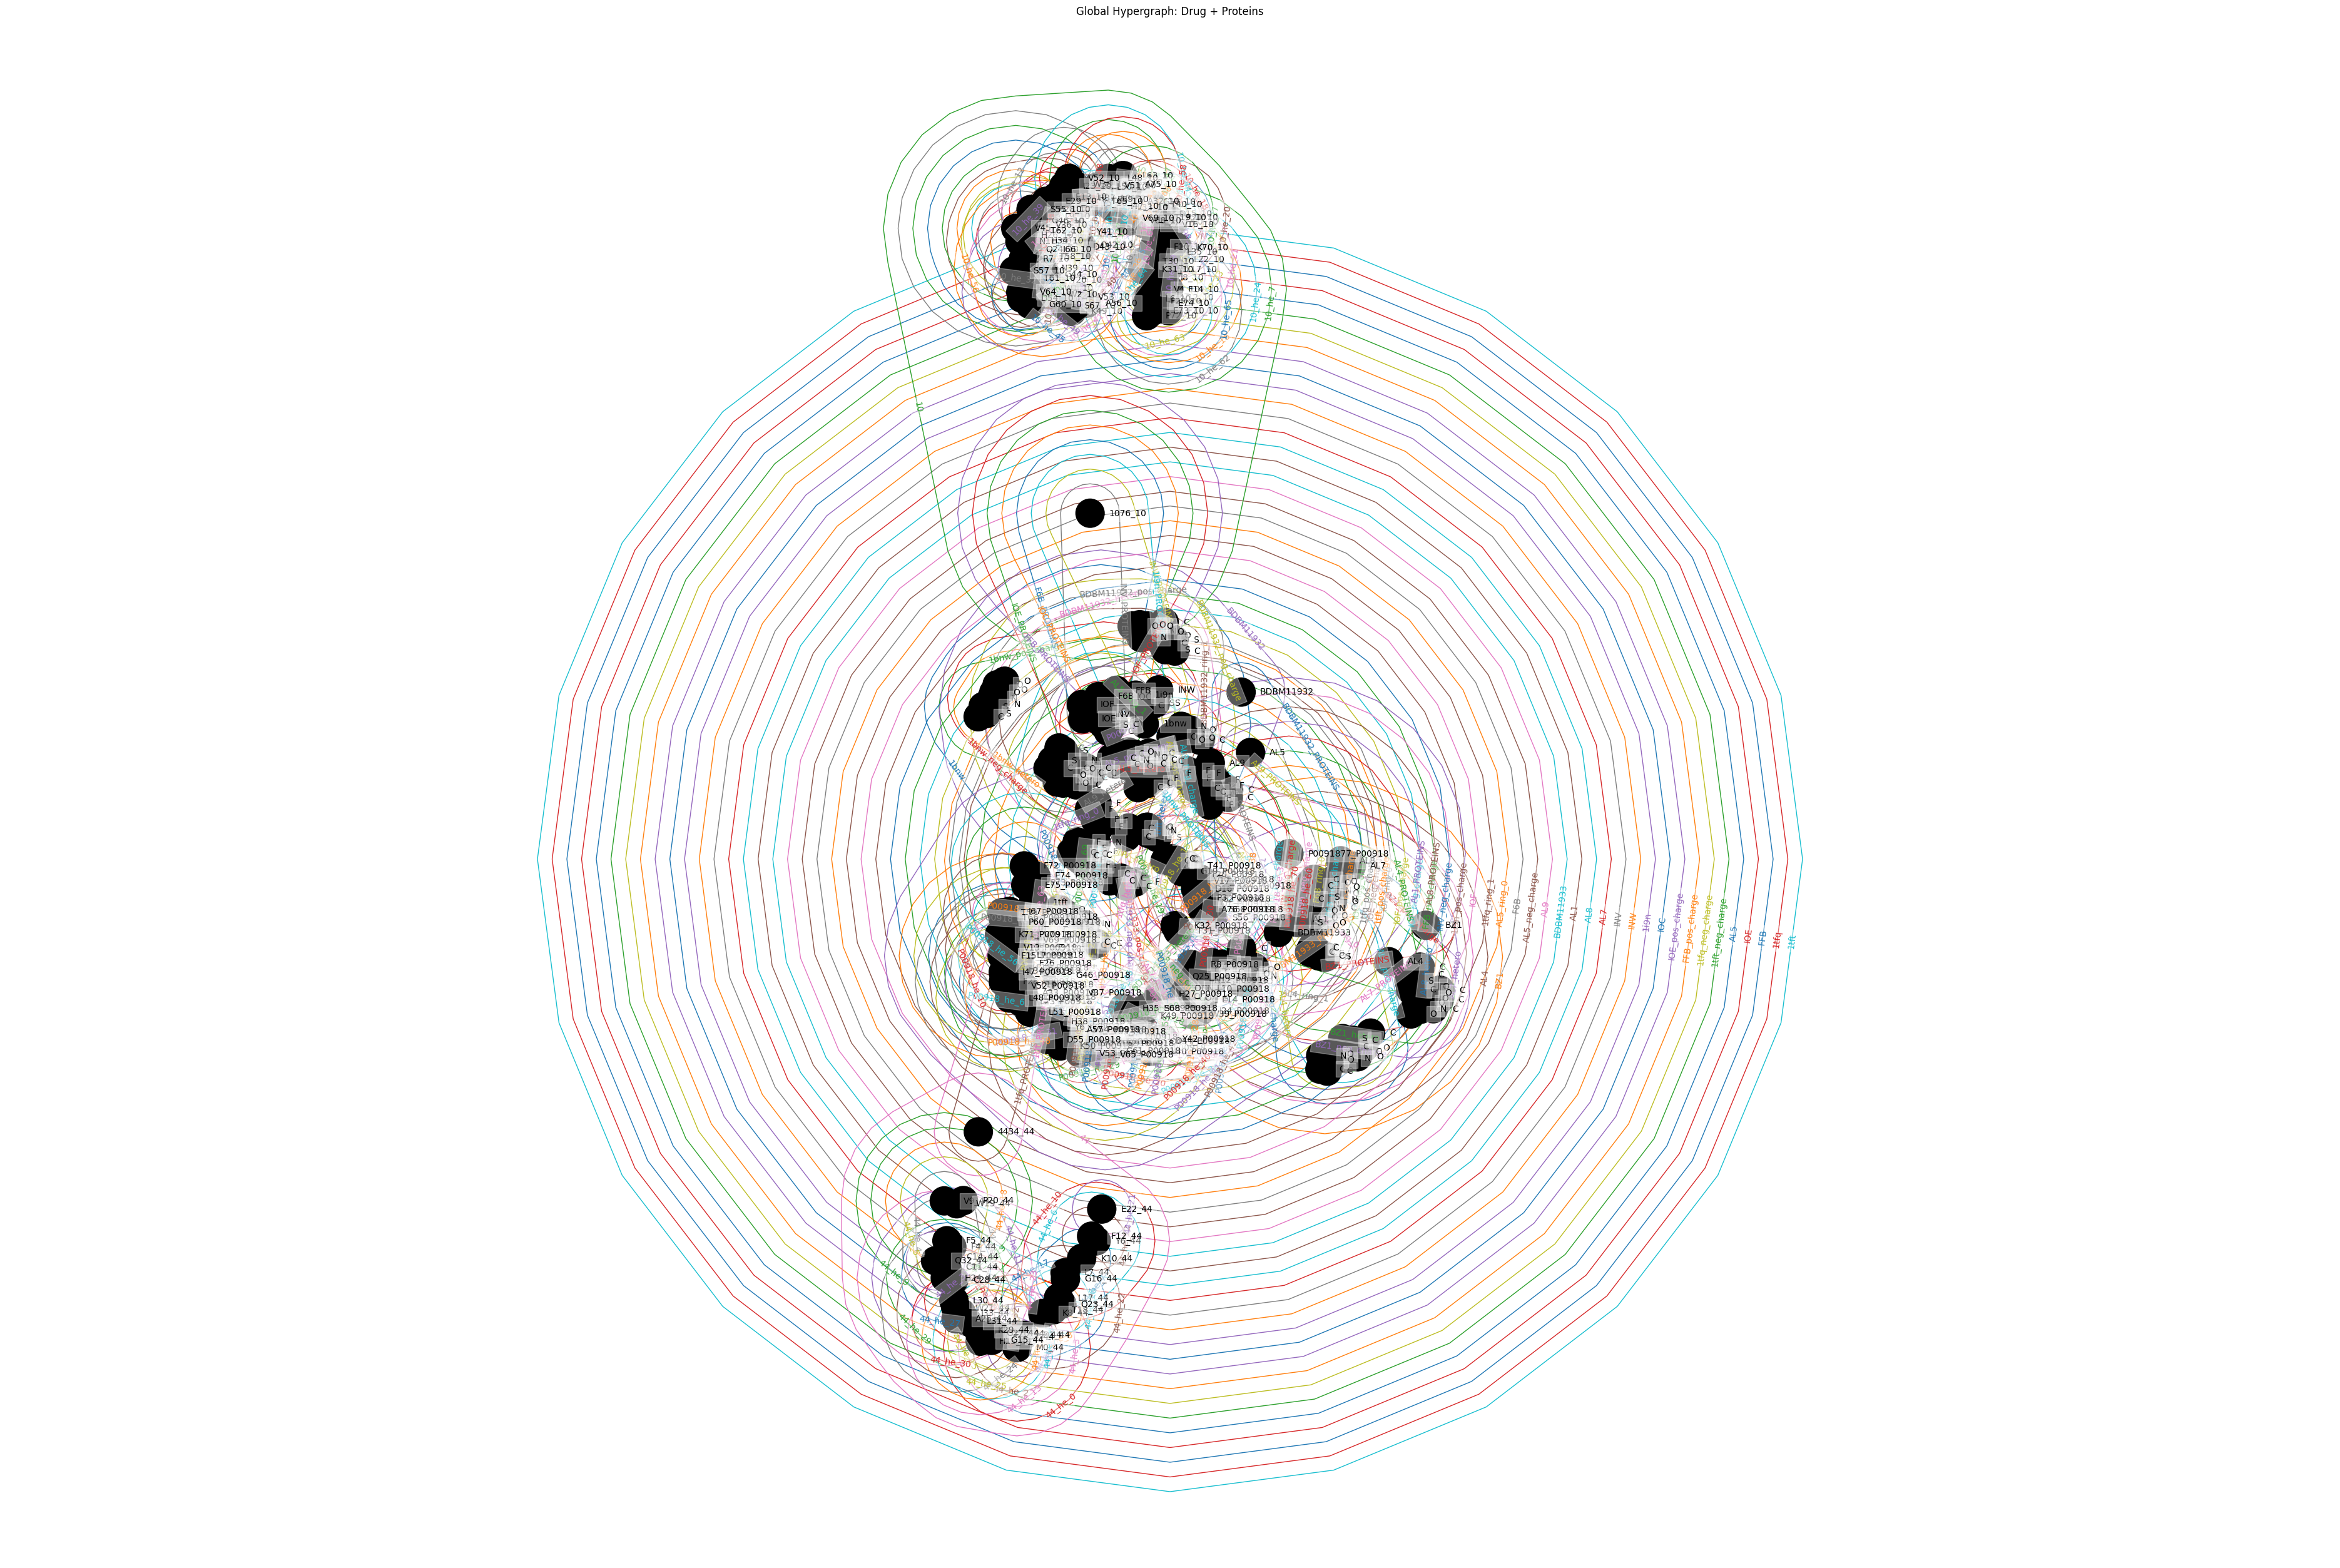

({0: 'C',
  1: 'C',
  2: 'C',
  3: 'C',
  4: 'C',
  5: 'C',
  6: 'N',
  7: 'S',
  8: 'O',
  9: 'O',
  10: 'C',
  11: 'C',
  12: 'C',
  13: 'C',
  14: 'S',
  15: 'S',
  16: 'N',
  17: 'O',
  18: 'O',
  19: 'C',
  20: 'C',
  21: 'AL5',
  22: 'C',
  23: 'O',
  24: 'C',
  25: 'N',
  26: 'S',
  27: 'O',
  28: 'O',
  29: 'S',
  30: 'N',
  31: 'O',
  32: 'O',
  33: 'AL9',
  34: 'N',
  35: 'S',
  36: 'O',
  37: 'O',
  38: 'S',
  39: 'O',
  40: 'O',
  41: 'N',
  42: 'C',
  43: '1bnw',
  44: 'N',
  45: 'S',
  46: 'O',
  47: 'O',
  48: 'C',
  49: 'O',
  50: 'C',
  51: 'N',
  52: 'C',
  53: 'S',
  54: 'O',
  55: 'O',
  56: 'BDBM11932',
  57: 'C',
  58: 'O',
  59: 'N',
  60: 'C',
  61: 'C',
  62: 'O',
  63: 'C',
  64: 'C',
  65: 'C',
  66: 'S',
  67: 'C',
  68: 'S',
  69: 'O',
  70: 'O',
  71: 'S',
  72: 'N',
  73: 'O',
  74: 'O',
  75: 'BDBM11933',
  76: 'C',
  77: 'C',
  78: 'N',
  79: 'C',
  80: 'C',
  81: 'N',
  82: 'C',
  83: 'C',
  84: 'O',
  85: 'C',
  86: 'S',
  87: 'O',
  88: 'O',
  89: 'C

In [44]:
create_global_hypergraph_from_drug_and_proteins(drug_to_proteins,
                                                    result_shared_drug,
                                                    result_shared_proteins)